In [2]:
import numpy as np
import pandas as pd
import ast
import copy
from collections import defaultdict
import random

import torch
from torch import nn
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset, SequentialSampler

from transformers import BertConfig, BertModel, BertTokenizer
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import classification_report
from tqdm import tqdm

In [3]:
df_all = pd.read_csv("df_all_token_512_nocharAll.csv")

In [4]:
num_read = len(df_all)


for a in range(num_read):
  df_all["ObjSts"][a] = ast.literal_eval(str(df_all["ObjSts"][a]))
  df_all["cluster"][a] = ast.literal_eval(str(df_all["cluster"][a]))
  df_all["mainChar_string"][a] = ast.literal_eval(str(df_all["mainChar_string"][a]))
  df_all["mainChar_number"][a] = ast.literal_eval(str(df_all["mainChar_number"][a]))
  df_all["document"][a] = ast.literal_eval(str(df_all["document"][a]))

def pairCharWithSts(df,index):
  charAll = defaultdict(list)
  for char,char_string in zip(df["mainChar_number"][index],df["mainChar_string"][index]):
    for sts in df["ObjSts"][index]:
      for c in char:
        if ' '.join(df['document'][index][c[0]:c[1] + 1]) in sts:
          charAll[' '.join(char_string)].append(sts)
          break
  return charAll

df_all["charAll"] = np.nan
for a in range(num_read):
  df_all["charAll"][a] = [pairCharWithSts(df_all,a)]

"""##First pair sentence to each character"""

df_all["ISts2vec"] = 0
df_all["text2vec"] = 0

max_length = 512
df_all["ISts2vec"] = 0
df_all["charSts2vec"] = 0
I = ["I", "I'm", "I’ve","Me", "i", "me"]
We = ["We"]
she = ["She", "she", "Her", "her"]
he = ["He", "he", "him", "Him"]
they = ["They","they","Them","them"]

"""###For "protagonist" discription"""
IsentenceNumber = 0
for a in range(num_read):
  if a%100 == 0:
    print(a)
  for key in df_all["charAll"][a][0].keys():
    isI = False
    isnotI = False
    for k in key.split(" "):
      if k in I:
        isI = True
      if k in she or k in he or k in they:
        isnotI = True
    if isI == True and isnotI == False:
      IsentenceNumber += len(df_all["charAll"][a][0][key])
      df_all["ISts2vec"][a] = " ".join(df_all["charAll"][a][0][key])

"""###For other discription"""

OthersentenceNumber = 0
for a in range(num_read):
  if a%100 == 0:
    print(a)
  charSts = []
  for key in df_all["charAll"][a][0].keys():
    isnotI = False
    for k in key.split(" "):
      if k in she or k in he or k in they:
        isnotI = True
    if isnotI == True:
      for sentence in df_all["charAll"][a][0][key]:
        charSts.append(sentence)
  charSts = set(charSts)
  OthersentenceNumber += len(charSts)
  df_all["text2vec"][a] =  " ".join(charSts)

/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/3252103126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["ObjSts"][a] = ast.literal_eval(str(df_all["ObjSts"][a]))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/3252103126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["cluster"][a] = ast.literal_eval(str(df_all["cluster"][a]))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/3252103126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

0
100
200
300

/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/3252103126.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["ISts2vec"][a] = " ".join(df_all["charAll"][a][0][key])



400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
187

/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/3252103126.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["text2vec"][a] =  " ".join(charSts)



500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
1

In [5]:
from sklearn.utils import shuffle
def upSampling(df_orginal):
    flairAll = defaultdict(int)
    for a in range(0, len(df_orginal)):
        flairAll[df_orginal["label"].iloc[a]] = flairAll[df_orginal["label"].iloc[a]] + 1
    print(flairAll)  
    df_orginal.reset_index(drop=True)
    df_orginal = df_orginal.sort_values(by=['label'],ignore_index=True)
    #Label 0 posts
    df_orginal_zero = df_orginal[:flairAll[0]]

    #Add more label 1 posts
    df_orginal_one = df_orginal[flairAll[0]:(flairAll[0]+flairAll[1])]
    df_orginal_one = pd.DataFrame(np.repeat(df_orginal_one.values, 9, axis=0), columns=df_orginal_one.columns)[:flairAll[0]]
    
    #Add more label 2 posts
    df_orginal_two = df_orginal[(flairAll[0]+flairAll[1]):(flairAll[0]+flairAll[1]+flairAll[2])]
    df_orginal_two = pd.DataFrame(np.repeat(df_orginal_two.values, 9, axis=0), columns=df_orginal_two.columns)[:flairAll[0]]


    #Add more label 3 posts
    df_orginal_three = df_orginal[(flairAll[0]+flairAll[1]+flairAll[2]):(flairAll[0]+flairAll[1]+flairAll[2]+flairAll[3])]
    df_orginal_three = pd.DataFrame(np.repeat(df_orginal_three.values, 20, axis=0), columns=df_orginal_three.columns)[:flairAll[0]]

    #Add more label 4 posts
    df_orginal_four = df_orginal[(flairAll[0]+flairAll[1]+flairAll[2]+flairAll[3]):(flairAll[0]+flairAll[1]+flairAll[2]+flairAll[3]+flairAll[4])]
    df_orginal_four = pd.DataFrame(np.repeat(df_orginal_four.values, 30, axis=0), columns=df_orginal_four.columns)[:flairAll[0]]

    df_orginal = pd.concat([df_orginal_zero,df_orginal_one,df_orginal_two,df_orginal_three,df_orginal_four],ignore_index=True).reset_index(drop=True)

    df_orginal = shuffle(df_orginal)
    return df_orginal

dataset = df_all[df_all.ISts2vec !=0]
print(len(dataset))
dataset = dataset[dataset.text2vec !=0]
print(len(dataset))
dataset.reset_index(drop=True)

"""# Train"""

# standard pytorch way of doing things
# 1. create a custom Dataset 
# 2. pass the dataset to a dataloader
# 3. iterate the dataloader and pass the inputs to the model
dataset_train = dataset[:-int(len(dataset)*0.2)]
dataset_train = upSampling(dataset_train)
flairAll = defaultdict(int)
for a in range(0, len(dataset_train)):
    flairAll[dataset_train.iloc[a]["label"]] = flairAll[dataset_train.iloc[a]["label"]] + 1
print(flairAll)  
dataset_val = dataset[-int(len(dataset)*0.2):-int(len(dataset)*0.1)]
dataset_test = dataset[-int(len(dataset)*0.1):]

56215
56215
defaultdict(<class 'int'>, {0: 30522, 4: 1138, 2: 7926, 1: 3484, 3: 1902})
defaultdict(<class 'int'>, {0: 30522, 4: 30522, 1: 30522, 3: 30522, 2: 30522})


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
dataset_test = dataset[-int(len(dataset)*0.1):]
X = dataset_train['text']
Y = dataset_train['label'].values.tolist()
random.seed(99)

val_text = dataset_val['text']
val_labels = dataset_val['label'].values.tolist()

test_text = dataset_test['text']
test_labels = dataset_test['label'].values.tolist()

vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
X1_tokened = vectorizer.fit_transform(dataset_train['text'])
X1_tokened = vectorizer.transform(dataset_train['ISts2vec'])
X2_tokened = vectorizer.transform(dataset_train['text2vec'])


train1_text = X1_tokened
train2_text = X2_tokened
test1_text = vectorizer.transform(dataset_test['ISts2vec'])
test2_text = vectorizer.transform(dataset_test['text2vec'])
val1_text = vectorizer.transform(dataset_val['ISts2vec'])
val2_text = vectorizer.transform(dataset_val['text2vec'])
train_labels = Y

In [8]:
import re

In [9]:
print(df_all["comet_xAttr"][0][-115:-93])
replaceTerm = df_all["comet_xAttr"][0][-115:-93]

,
      dtype=float32)


In [10]:
def cleanData(df_all):
    for a in range(0, len(df_all["comet_xAttr"])):
      df_all["comet_xAttr"][a] = ast.literal_eval(str(df_all["comet_xAttr"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
      df_all["comet_xIntent"][a] = ast.literal_eval(str(df_all["comet_xIntent"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
      df_all["comet_xEffect"][a] = ast.literal_eval(str(df_all["comet_xEffect"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
      df_all["comet_oEffect"][a] = ast.literal_eval(str(df_all["comet_oEffect"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
    return df_all

In [11]:
dataset_train = cleanData(dataset_train)

KeyError: 0

In [12]:
dataset_val = cleanData(dataset_val.reset_index())

/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/2751109154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["comet_xAttr"][a] = ast.literal_eval(str(df_all["comet_xAttr"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/2751109154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["comet_xIntent"][a] = ast.literal_eval(str(df_all["comet_xIntent"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipyke

In [13]:
dataset_test = cleanData(dataset_test.reset_index() )

/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/2751109154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["comet_xAttr"][a] = ast.literal_eval(str(df_all["comet_xAttr"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/2751109154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["comet_xIntent"][a] = ast.literal_eval(str(df_all["comet_xIntent"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipyke

In [41]:
df_all = cleanData(df_all.reset_index())

/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/2751109154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["comet_xAttr"][a] = ast.literal_eval(str(df_all["comet_xAttr"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipykernel_8285/2751109154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["comet_xIntent"][a] = ast.literal_eval(str(df_all["comet_xIntent"][a][1:-1]).replace("array(","").replace(replaceTerm,"").replace(", dtype=float32)",""))
/var/folders/hy/3tcs8g953p99krbd85hy97r00000gn/T/ipyke

In [75]:
print(df_all.iloc[0]["text2vec"])
print(df_all.iloc[0]["comet_oEffect"])
def getTerm(df_all,attr,t,a):
    result = []
    for b in range(len(df_all.iloc[a][attr]["sentence"])):
        if df_all.iloc[a][attr]["sentence"][b] in df_all.iloc[a][t]:
            result+=(df_all.iloc[a][attr]["string"][b])
    return result

 Recently i wanted to get ark genesis expansion becuase it looked very good and wanted to play it so i bought it wo telling my parents since i thought its fine to buy things by myself(34  Didnt know but days later my parents found out and are furious I(15m) got a debit card a month ago, ive been reluctant to buy anything and because of that i been crictized and called names by my parents centered around i wont buy anything
{'sentence': ['I(15m) got a debit card a month ago, ive been reluctant to buy anything and because of that i been crictized and called names by my parents centered around i wont buy anything', ' Recently i wanted to get ark genesis expansion becuase it looked very good and wanted to play it so i bought it wo telling my parents since i thought its fine to buy things by myself(34', ' Didnt know but days later my parents found out and are furious', ' I live in the U'], 'string': [['i wo nt buy anything', 'i wo nt buy something', 'they want', 'none', 'i wo nt get a debit

In [76]:
print(getTerm(df_all,"comet_xAttr","ISts2vec",3))

["i don't know what to say", "i'm not sure what to say", 'none', 'sorry', "i don't know how to explain it", 'a member', 'dedicated', 'religious', 'responsible', 'social', 'and none', 'a bully', 'none', 'a group of boys', 'a group of kids', 'bored', 'careless', 'annoyed', 'rude', 'a drunk', 'a ritual', 'a priest', 'the other half', 'the other half orcs', 'dedicated', 'the other person', 'for the conflict', 'for the conflict with dnd', 'for not being able to participate', 'for not being able to participate in the event', 'considerate', 'thoughtful', 'respectful', 'nice', 'nice person', 'frustrated', 'unmotivated', 'annoyed', 'careless', 'determined']


In [77]:
def getRightFeature(df_all):
    train_text_xAttr = []
    train_text_xIntent = []
    train_text_xEffect = []
    train_text_oEffect = []

    for a in range(0, len(df_all["ObjSts"])):
        if df_all["ISts2vec"][a] == 0 and df_all["text2vec"][a] == 0:
            train_text_xAttr.append([0])
            train_text_xIntent.append([0])
            train_text_xEffect.append([0])
            train_text_oEffect.append([0])
        elif df_all["ISts2vec"][a] == 0 and df_all["text2vec"][a] != 0:
            train_text_xAttr.append([0])
            train_text_xIntent.append([0])
            train_text_xEffect.append([0])
            train_text_oEffect.append(getTerm(df_all,"comet_oEffect","text2vec",a))
        elif df_all["ISts2vec"][a] != 0 and df_all["text2vec"][a] == 0:
            train_text_xAttr.append(getTerm(df_all,"comet_xAttr","ISts2vec",a))
            train_text_xIntent.append(getTerm(df_all,"comet_xIntent","ISts2vec",a))
            train_text_xEffect.append(getTerm(df_all,"comet_xEffect","ISts2vec",a))
            train_text_oEffect.append([0])
        else:
            train_text_xAttr.append(getTerm(df_all,"comet_xAttr","ISts2vec",a))
            train_text_xIntent.append(getTerm(df_all,"comet_xIntent","ISts2vec",a))
            train_text_xEffect.append(getTerm(df_all,"comet_xEffect","ISts2vec",a))
            train_text_oEffect.append(getTerm(df_all,"comet_oEffect","text2vec",a))
    return train_text_xAttr, train_text_xIntent, train_text_xEffect, train_text_oEffect

In [78]:
train_text_xAttr, train_text_xIntent, train_text_xEffect, train_text_oEffect = getRightFeature(dataset_train)

In [79]:
val_text_xAttr, val_text_xIntent, val_text_xEffect, val_text_oEffect = getRightFeature(dataset_val)
test_text_xAttr, test_text_xIntent, test_text_xEffect, test_text_oEffect = getRightFeature(dataset_test)

In [80]:
def combine(a):
    x = []
    for b in a:
        x.append(" ".join(b))
    return x
train_text_xAttr_joined = combine(train_text_xAttr)
train_text_xIntent_joined = combine(train_text_xIntent)
train_text_xEffect_joined = combine(train_text_xEffect)
train_text_oEffect_joined = combine(train_text_oEffect)

val_text_xAttr_joined = combine(val_text_xAttr)
val_text_xIntent_joined = combine(val_text_xIntent)
val_text_xEffect_joined = combine(val_text_xEffect)
val_text_oEffect_joined = combine(val_text_oEffect)

test_text_xAttr_joined = combine(test_text_xAttr)
test_text_xIntent_joined = combine(test_text_xIntent)
test_text_xEffect_joined = combine(test_text_xEffect)
test_text_oEffect_joined = combine(test_text_oEffect)

In [81]:
vectorizer1 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
vectorizer2= TfidfVectorizer(ngram_range=(1,1), stop_words="english")
vectorizer3 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
vectorizer4 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")

In [82]:
train_text_xAttr_vec = vectorizer1.fit_transform(train_text_xAttr_joined)
train_text_xIntent_vec = vectorizer2.fit_transform(train_text_xIntent_joined)
train_text_xEffect_vec = vectorizer3.fit_transform(train_text_xEffect_joined)
train_text_oEffect_vec = vectorizer4.fit_transform(train_text_oEffect_joined)

val_text_xAttr_vec = vectorizer1.transform(val_text_xAttr_joined)
val_text_xIntent_vec = vectorizer2.transform(val_text_xIntent_joined)
val_text_xEffect_vec = vectorizer3.transform(val_text_xEffect_joined)
val_text_oEffect_vec = vectorizer4.transform(val_text_oEffect_joined)

test_text_xAttr_vec = vectorizer1.transform(test_text_xAttr_joined)
test_text_xIntent_vec = vectorizer2.transform(test_text_xIntent_joined)
test_text_xEffect_vec = vectorizer3.transform(test_text_xEffect_joined)
test_text_oEffect_vec = vectorizer4.transform(test_text_oEffect_joined)

In [83]:
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack

In [84]:
text_combine_train = hstack((train1_text,train2_text,train_text_xAttr_vec,train_text_xIntent_vec,train_text_xEffect_vec,train_text_oEffect_vec))
text_combine_val = hstack((val1_text,val2_text,val_text_xAttr_vec,val_text_xIntent_vec,val_text_xEffect_vec,val_text_oEffect_vec))
text_combine_test = hstack((test1_text,test2_text,test_text_xAttr_vec,test_text_xIntent_vec,test_text_xEffect_vec,test_text_oEffect_vec))

In [85]:
print(train2_text.shape)
print(train_text_xAttr_vec.shape)

(152610, 50120)
(152610, 10168)


In [86]:
LG_clf = LogisticRegression(solver='liblinear').fit(text_combine_train, train_labels)

In [87]:
print("Validation")
predictions = LG_clf.predict(text_combine_val)
print(classification_report(val_labels,predictions))
accuracy = (val_labels == predictions).sum()/len(val_labels)
print('LG accuracy:', accuracy)

#Test
print("Test")
predictions = LG_clf.predict(text_combine_test)
print(classification_report(test_labels,predictions))
accuracy = (test_labels == predictions).sum()/len(test_labels)
print('LG accuracy:', accuracy)

Validation
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      3675
           1       0.13      0.22      0.16       456
           2       0.28      0.21      0.24      1099
           3       0.08      0.10      0.09       253
           4       0.05      0.07      0.06       139

    accuracy                           0.50      5622
   macro avg       0.25      0.25      0.25      5622
weighted avg       0.52      0.50      0.51      5622

LG accuracy: 0.49608680184987547
Test
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      3764
           1       0.15      0.27      0.19       440
           2       0.26      0.21      0.23      1055
           3       0.09      0.12      0.10       227
           4       0.02      0.02      0.02       135

    accuracy                           0.51      5621
   macro avg       0.25      0.26      0.25      5621
weighted avg       0.54     

In [88]:
import re

In [237]:
def getTopAttr(df,type_comet):
    result = []
    for a in range(len(df)):
        flairAll = defaultdict(int)
        for b in df[type_comet].iloc[a]["string"]:
            for c in b:
                if c != "none" and c != ".":
                    flairAll[c] = flairAll[c] + 1
        temp = sorted(flairAll.items(), key=lambda kv: kv[1],reverse=True)[:5]
        tempResult = ""
        for t in temp:
            tempResult+=" "+t[0]
        tempResult = tempResult.strip()
        result.append(tempResult)
    return result

In [238]:
x_attr_train = getTopAttr(dataset_train,"comet_xAttr")
x_attr_val = getTopAttr(dataset_val,"comet_xAttr")
x_attr_test = getTopAttr(dataset_test,"comet_xAttr")

x_Intent_train = getTopAttr(dataset_train,"comet_xIntent")
x_Intent_val = getTopAttr(dataset_val,"comet_xIntent")
x_Intent_test = getTopAttr(dataset_test,"comet_xIntent")

x_xEffect_train = getTopAttr(dataset_train,"comet_xEffect")
x_xEffect_attr_val = getTopAttr(dataset_val,"comet_xEffect")
x_xEffect_attr_test = getTopAttr(dataset_test,"comet_xEffect")

x_oEffect_train = getTopAttr(dataset_train,"comet_oEffect")
x_oEffect_attr_val = getTopAttr(dataset_val,"comet_oEffect")
x_oEffect_attr_test = getTopAttr(dataset_test,"comet_oEffect")

In [259]:
print(x_attr_train[2])

to <xeffect> none to <xneed> none to <xwant> to go home to <xneed> to have a plan to <xwant> to go to the store


In [239]:
vectorizer5 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
vectorizer6= TfidfVectorizer(ngram_range=(1,1), stop_words="english")
vectorizer7 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
vectorizer8 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")

In [240]:
train_xAttr_vec = vectorizer5.fit_transform(x_attr_train)
train_xIntent_vec = vectorizer6.fit_transform(x_Intent_train)
train_xEffect_vec = vectorizer7.fit_transform(x_xEffect_train)
train_oEffect_vec = vectorizer8.fit_transform(x_oEffect_train)

val_xAttr_vec = vectorizer5.transform(x_attr_val)
val_xIntent_vec = vectorizer6.transform(x_Intent_val)
val_xEffect_vec = vectorizer7.transform(x_xEffect_attr_val)
val_oEffect_vec = vectorizer8.transform(x_oEffect_attr_val)

test_xAttr_vec = vectorizer5.transform(x_attr_test)
test_xIntent_vec = vectorizer6.transform(x_Intent_test)
test_xEffect_vec = vectorizer7.transform(x_xEffect_attr_test)
test_oEffect_vec = vectorizer8.transform(x_oEffect_attr_test)

In [263]:
combine_train = hstack((train1_text,train2_text,train_xAttr_vec,train_xIntent_vec,train_xEffect_vec,train_oEffect_vec))
combine_val = hstack((val1_text,val2_text,val_xAttr_vec,val_xIntent_vec,val_xEffect_vec,val_oEffect_vec))
combine_test = hstack((test1_text,test2_text,test_xAttr_vec,test_xIntent_vec,test_xEffect_vec,test_oEffect_vec))

# combine_train = hstack((train1_text,train2_text,train_xAttr_vec,train_xIntent_vec,train_xEffect_vec))
# combine_val = hstack((val1_text,val2_text,val_xAttr_vec,val_xIntent_vec,val_xEffect_vec))
# combine_test = hstack((test1_text,test2_text,test_xAttr_vec,test_xIntent_vec,test_xEffect_vec))

In [264]:
LG_clf_new = LogisticRegression(solver='liblinear').fit(combine_train, train_labels)

In [265]:
print("Validation")
predictions = LG_clf_new.predict(combine_val)
print(classification_report(val_labels,predictions))
accuracy = (val_labels == predictions).sum()/len(val_labels)
print('LG accuracy:', accuracy)

#Test
print("Test")
predictions_COMET = LG_clf_new.predict(combine_test)
print(classification_report(test_labels,predictions_COMET))
accuracy = (test_labels == predictions_COMET).sum()/len(test_labels)
print('LG accuracy:', accuracy)

Validation
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      3675
           1       0.14      0.25      0.18       456
           2       0.27      0.21      0.24      1099
           3       0.08      0.11      0.09       253
           4       0.04      0.06      0.05       139

    accuracy                           0.48      5622
   macro avg       0.24      0.25      0.24      5622
weighted avg       0.52      0.48      0.50      5622

LG accuracy: 0.47954464603344005
Test
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      3764
           1       0.11      0.22      0.15       440
           2       0.25      0.21      0.23      1055
           3       0.10      0.15      0.12       227
           4       0.02      0.03      0.02       135

    accuracy                           0.49      5621
   macro avg       0.24      0.25      0.24      5621
weighted avg       0.54     

In [267]:
(0.66+0.18+0.24+0.09+0.06)/5

0.24600000000000005

In [244]:
def getTopAttr1(df,type_comet):
    result = []
    for a in range(len(df)):
        flairAll = defaultdict(int)
        for b in df[type_comet].iloc[a]["string"]:
            for c in b:
                if c != "none" and c != ".":
                    flairAll[c] = flairAll[c] + 1
        temp = sorted(flairAll.items(), key=lambda kv: kv[1],reverse=True)[:5]
        tempResult = []
        for t in temp:
            tempResult.append(t[0])
        result.append(tempResult)
    return result

In [245]:
df_orginal = df_all
flairAll = defaultdict(int)
for a in range(0, len(df_orginal)):
    flairAll[df_orginal["label"].iloc[a]] = flairAll[df_orginal["label"].iloc[a]] + 1
print(flairAll) 
df_orginal.reset_index(drop=True)
df_orginal = df_orginal.sort_values(by=['label'],ignore_index=True)
#Label 0 posts
df_orginal_zero = df_orginal[:flairAll[0]]

#Add more label 1 posts
df_orginal_one = df_orginal[flairAll[0]:(flairAll[0]+flairAll[1])]

#Add more label 2 posts
df_orginal_two = df_orginal[(flairAll[0]+flairAll[1]):(flairAll[0]+flairAll[1]+flairAll[2])]

#Add more label 3 posts
df_orginal_three = df_orginal[(flairAll[0]+flairAll[1]+flairAll[2]):(flairAll[0]+flairAll[1]+flairAll[2]+flairAll[3])]

#Add more label 4 posts
df_orginal_four = df_orginal[(flairAll[0]+flairAll[1]+flairAll[2]+flairAll[3]):(flairAll[0]+flairAll[1]+flairAll[2]+flairAll[3]+flairAll[4])]

defaultdict(<class 'int'>, {0: 39068, 4: 1459, 2: 10351, 1: 4476, 3: 2468})


In [246]:
print(df_orginal_two)

       level_0  Unnamed: 0  index  \
43544    52754       52754  87370   
43545    55280       55280  91620   
43546    46179       46179  76752   
43547    55408       55408  91822   
43548    50707       50707  84018   
...        ...         ...    ...   
53890    33803       33803  56895   
53891    32215       32215  54402   
53892    32496       32496  54885   
53893    33622       33622  56605   
53894    33792       33792  56875   

                                                    text  \
43544  Throwaway for privacy.\nI (32M) with my wife (...   
43545  We gather at my mother-in-law's place every ye...   
43546  I’ll be blunt. I’m a straight A student. I kno...   
43547  We have been in a relationship for 3 years and...   
43548  I (22M) have been dating my girlfriend (21F) f...   
...                                                  ...   
53890  for context: i given my main email to the teac...   
53891  Hi,\n\nI (28M) live with my long term girlfrie...   
53892  Hi every

In [247]:
x_attr_0 = getTopAttr1(df_orginal_zero,"comet_xAttr")
x_Intent_0 = getTopAttr1(df_orginal_zero,"comet_xIntent")
x_xEffect_0 = getTopAttr1(df_orginal_zero,"comet_xEffect")
x_oEffect_0 = getTopAttr1(df_orginal_zero,"comet_oEffect")

x_attr_1 = getTopAttr1(df_orginal_one,"comet_xAttr")
x_Intent_1 = getTopAttr1(df_orginal_one,"comet_xIntent")
x_xEffect_1 = getTopAttr1(df_orginal_one,"comet_xEffect")
x_oEffect_1 = getTopAttr1(df_orginal_one,"comet_oEffect")

x_attr_2 = getTopAttr1(df_orginal_two,"comet_xAttr")
x_Intent_2 = getTopAttr1(df_orginal_two,"comet_xIntent")
x_xEffect_2 = getTopAttr1(df_orginal_two,"comet_xEffect")
x_oEffect_2 = getTopAttr1(df_orginal_two,"comet_oEffect")

x_attr_3 = getTopAttr1(df_orginal_three,"comet_xAttr")
x_Intent_3 = getTopAttr1(df_orginal_three,"comet_xIntent")
x_xEffect_3 = getTopAttr1(df_orginal_three,"comet_xEffect")
x_oEffect_3 = getTopAttr1(df_orginal_three,"comet_oEffect")

x_attr_4 = getTopAttr1(df_orginal_four,"comet_xAttr")
x_Intent_4 = getTopAttr1(df_orginal_four,"comet_xIntent")
x_xEffect_4 = getTopAttr1(df_orginal_four,"comet_xEffect")
x_oEffect_4 = getTopAttr1(df_orginal_four,"comet_oEffect")

In [248]:
print(df_orginal_zero.iloc[0]["text"])
print(df_orginal_zero.iloc[0]["comet_xAttr"])
print()
print(x_attr_0[0])

I(15m) got a debit card a month ago, ive been reluctant to buy anything and because of that i been crictized and called names by my parents centered around i wont buy anything. Recently i wanted to get ark genesis expansion becuase it looked very good and wanted to play it so i bought it wo telling my parents since i thought its fine to buy things by myself(34.59$). By no means that i spend money, usually play free games or buy games in the 10-20 margin(before got debit card). Didnt know but days later my parents found out and are furious. I live in the U.S and i thought buying games wo telling my parents is fine but they told me its aganist the law wo telling parents and my mom threaten to block my acc and stating theyre trying to control my spending.Now i feel bad, i dont know if im the amita or not.
{'sentence': ['I(15m) got a debit card a month ago, ive been reluctant to buy anything and because of that i been crictized and called names by my parents centered around i wont buy anyt

In [114]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [249]:
def getWordCloud(word):
    # fit a 2d PCA model to the vectors
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(word)
    # plot the WordCloud image                      
    pyplot.figure(figsize = (5, 5), facecolor = None)
    pyplot.imshow(wordcloud)
    pyplot.axis("off")
    pyplot.tight_layout(pad = 0)

    pyplot.show()

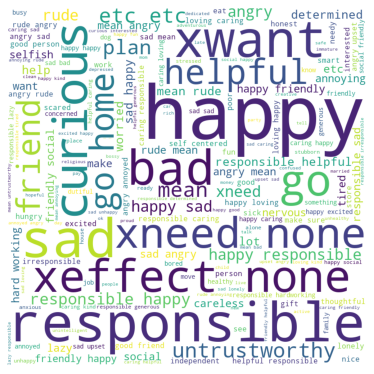

In [250]:
getWordCloud(" ".join([n for one_dim in x_attr_0 for n in one_dim]))

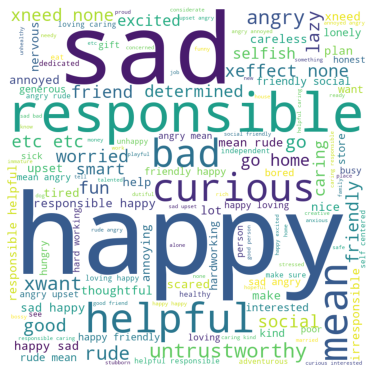

In [251]:
getWordCloud(" ".join([n for one_dim in x_attr_2 for n in one_dim]))

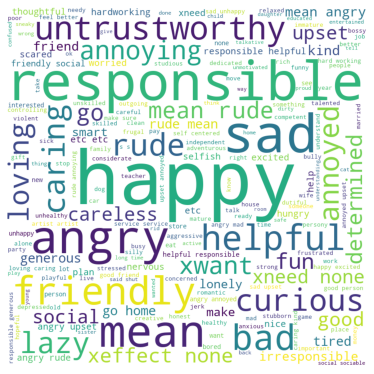

In [252]:
getWordCloud(" ".join([n for one_dim in x_attr_3 for n in one_dim]))

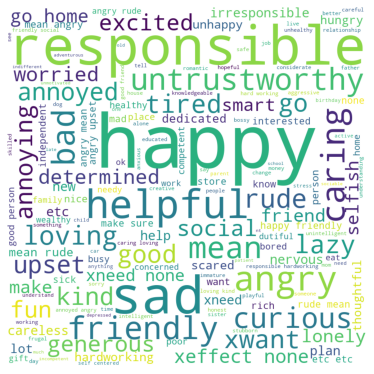

In [253]:
getWordCloud(" ".join([n for one_dim in x_attr_4 for n in one_dim]))

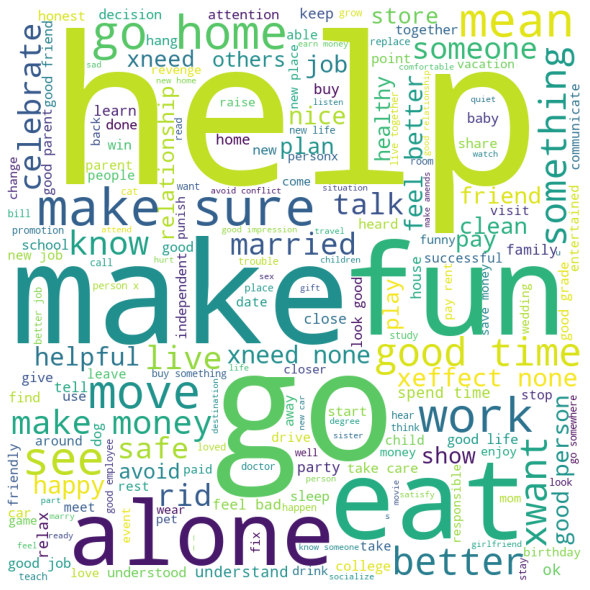

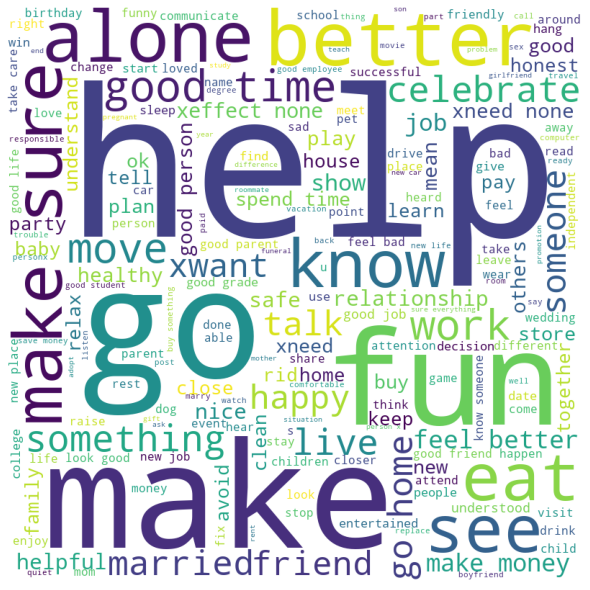

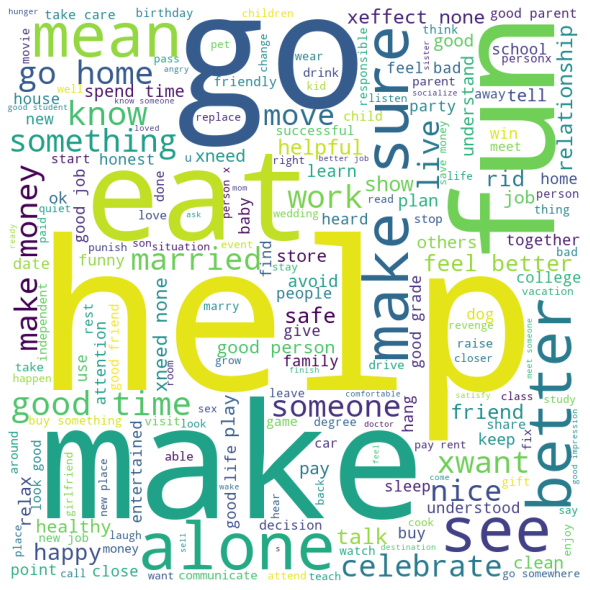

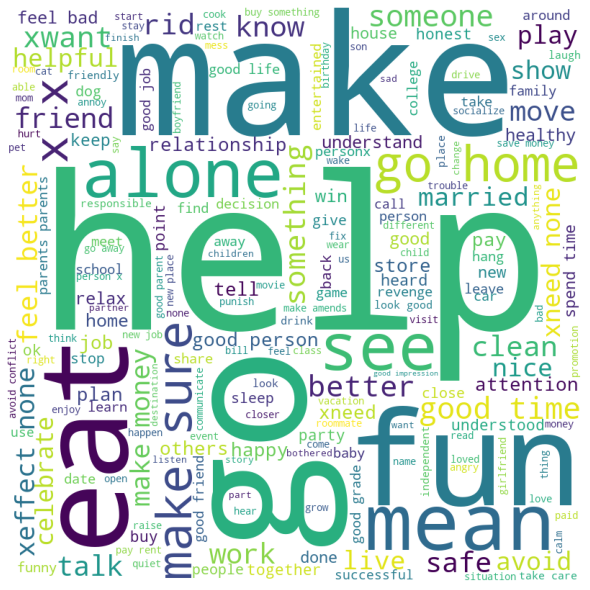

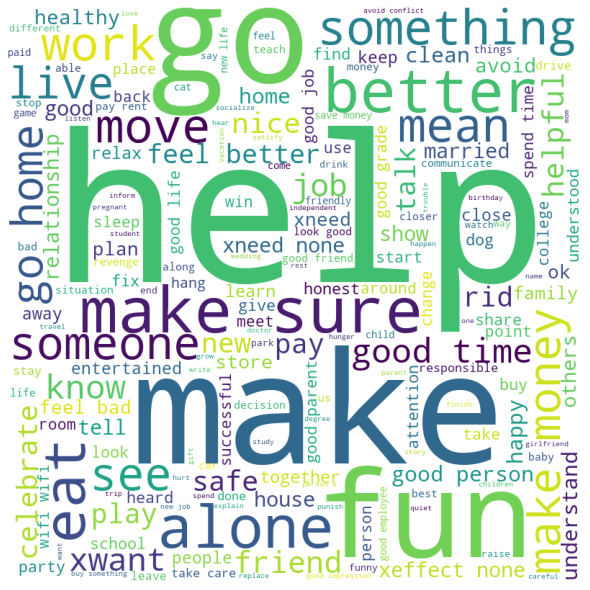

In [123]:
getWordCloud(" ".join([n for one_dim in x_Intent_0 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_Intent_1 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_Intent_2 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_Intent_3 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_Intent_4 for n in one_dim]))

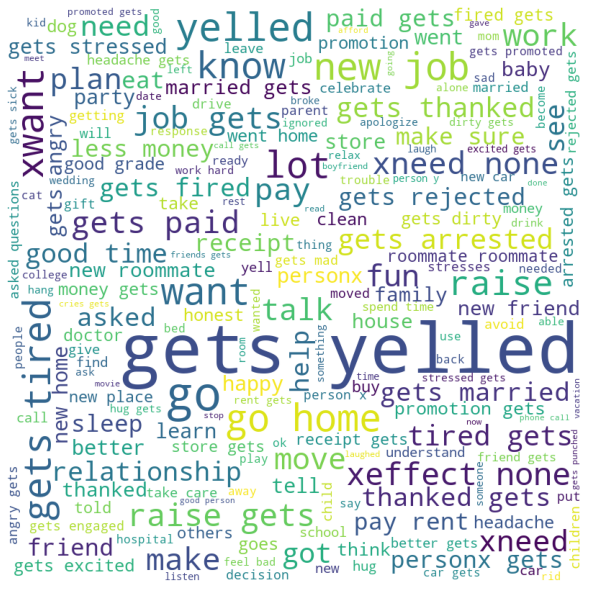

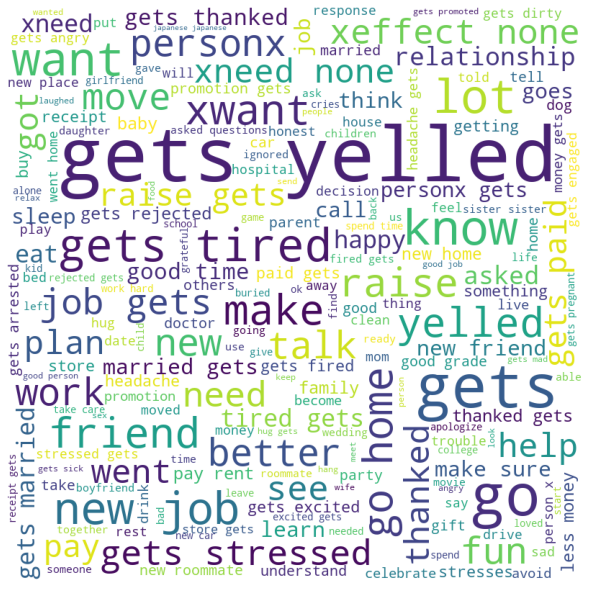

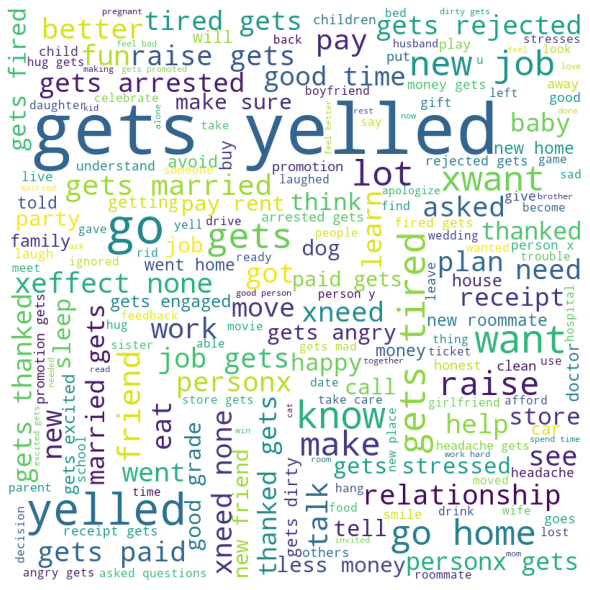

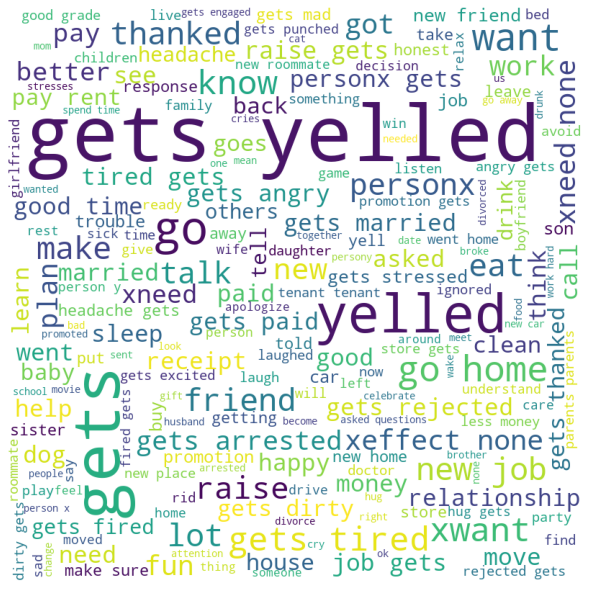

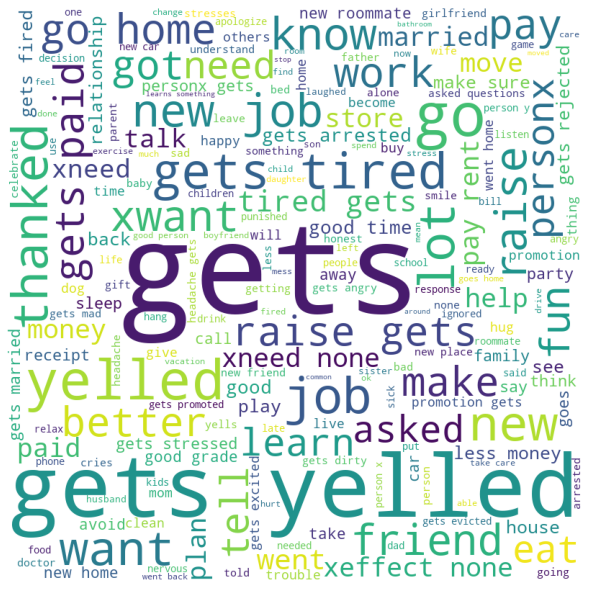

In [124]:
getWordCloud(" ".join([n for one_dim in x_xEffect_0 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_xEffect_1 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_xEffect_2 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_xEffect_3 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_xEffect_4 for n in one_dim]))

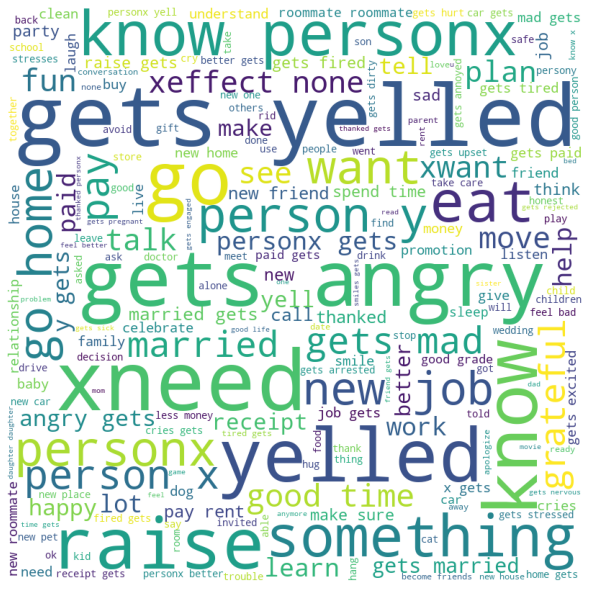

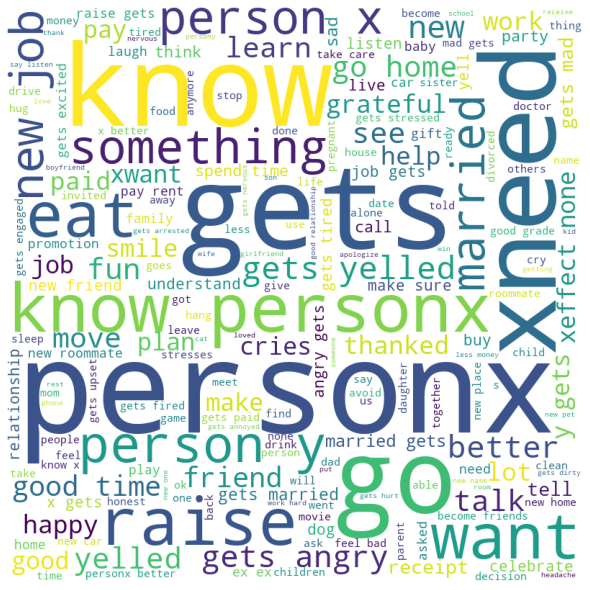

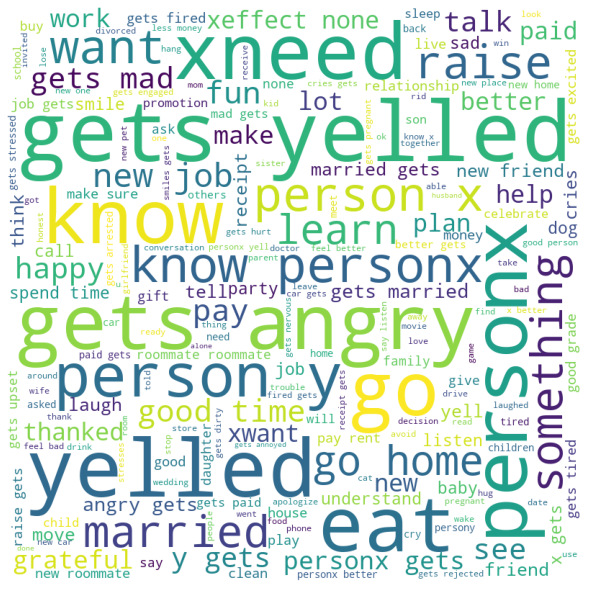

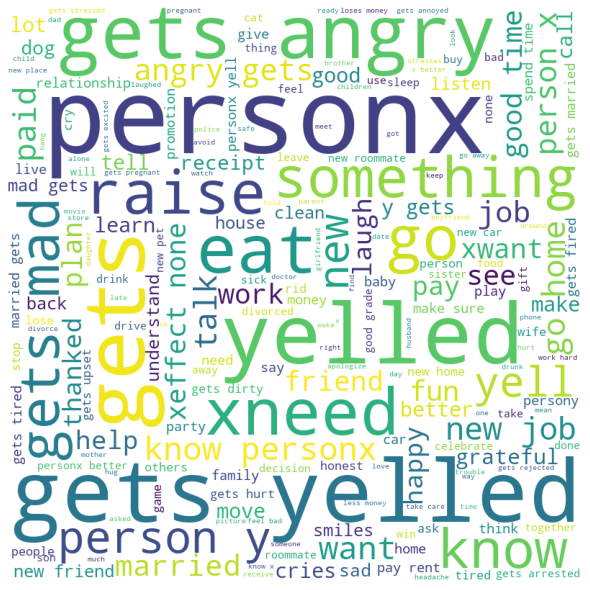

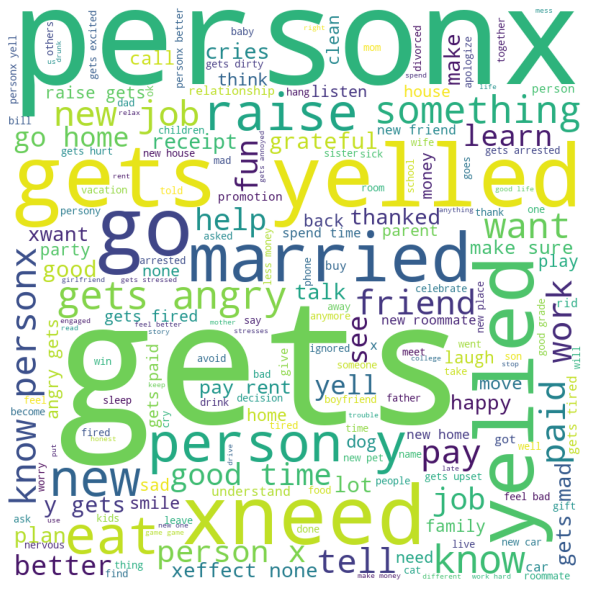

In [125]:
getWordCloud(" ".join([n for one_dim in x_oEffect_0 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_oEffect_1 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_oEffect_2 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_oEffect_3 for n in one_dim]))
getWordCloud(" ".join([n for one_dim in x_oEffect_4 for n in one_dim]))

def getVecWordCloud(model):
    # fit a 2d PCA model to the vectors
    X = model.wv[list(model.wv.index_to_key)]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()

In [108]:
print(model_0_attr)

Word2Vec<vocab=20537, vector_size=100, alpha=0.025>


In [131]:
text_train_none = hstack((train1_text,train2_text))
text_val_none = hstack((val1_text,val2_text))
text_test_none = hstack((test1_text,test2_text))
#Logistics regression none
LG_clf_None = LogisticRegression(solver='liblinear').fit(text_train_none , train_labels)
#Validation
print("Validation")
predictions_val_none = LG_clf_None.predict(text_val_none)
print(classification_report(val_labels,predictions_val_none))
accuracy = (val_labels == predictions_val_none).sum()/len(val_labels)
print('LG accuracy:', accuracy)

#Test
print("Test")
predictions_test_none = LG_clf_None.predict(text_test_none)
print(classification_report(test_labels,predictions_test_none))
accuracy = (test_labels == predictions_test_none).sum()/len(test_labels)
print('LG accuracy:', accuracy)

Validation
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      3675
           1       0.14      0.29      0.19       456
           2       0.30      0.27      0.28      1099
           3       0.07      0.13      0.09       253
           4       0.06      0.12      0.07       139

    accuracy                           0.46      5622
   macro avg       0.26      0.27      0.25      5622
weighted avg       0.54      0.46      0.49      5622

LG accuracy: 0.45553183920313056
Test
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      3764
           1       0.13      0.29      0.18       440
           2       0.28      0.27      0.27      1055
           3       0.09      0.18      0.12       227
           4       0.04      0.07      0.05       135

    accuracy                           0.46      5621
   macro avg       0.25      0.27      0.25      5621
weighted avg       0.55     

In [ ]:
Test
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      3764
           1       0.11      0.22      0.15       440
           2       0.25      0.21      0.23      1055
           3       0.10      0.15      0.12       227
           4       0.02      0.03      0.02       135

    accuracy                           0.49      5621
   macro avg       0.24      0.25      0.24      5621
weighted avg       0.54      0.49      0.51      5621

LG accuracy: 0.48567870485678705

In [143]:
from sklearn.metrics import confusion_matrix

In [172]:
None_correct_test = (test_labels == predictions_test_none)
COMET_correct_test = (test_labels == predictions_COMET)
print(sum(test_labels == predictions_test_none))
print(sum(test_labels == predictions_COMET))

2576
3243


In [176]:
all_correct = []
COMET_correct = []
None_correct = []
all_false = []
for a in range(len(None_correct_test)):
    if (None_correct_test[a]==True) and (COMET_correct_test[a]==True):
        all_correct.append(a)
    elif (None_correct_test[a]==False) and (COMET_correct_test[a]==True):
        COMET_correct.append(a)
    elif (None_correct_test[a]==True) and (COMET_correct_test[a]==False):
        None_correct.append(a)
    else:
        all_false.append(a)
print(len(all_correct))
print(len(COMET_correct))
print(len(None_correct))
print(len(all_false))

2137
1106
439
1939


In [256]:
flair_map = {0:'not the a-hole', 1:'no a-holes here', 2:'asshole', 3:'everyone sucks',4:'not enough info'}
for a in COMET_correct[1:2]:
    print(dataset_test["text"][a])
    print()
    print("Correct Label")
    print()
    print(flair_map[dataset_test["label"][a]])
    print()
    print("LG Label")
    print()
    print(flair_map[predictions_test_none[a]])
    print()
    print("xAttr")
    print(x_attr_test[a])
    print("xIntent")
    print(x_Intent_test[a])
    print("xEffect")
    print(x_xEffect_attr_test[a])
    print("oEffect")
    print(x_oEffect_attr_test[a])
    print("---------------------------------")

I am recently divorced and have been dating this woman who has been divorced for a longer time. She came to my place for the first time, and from everything that seemed, a good time was had by both of us. A day later she texted that (paraphrased) 'I wish you the best, we are not good for each other'. Another day later she texted again to say (again, paraphrased) 'I wanted to give you a more detailed reason. When I came to your house, I felt like I was entering a married man's house because you had pictures of your wife in the house'. I explained that the 4 - 6 pictures that I had were important milestones (birthdays, my new born son meeting my elderly parents in India (with my ex in the pic), etc, and that none of the pictures was of me and my ex only. She said that she did not have any pics of her ex in her home, even though she has a daughter with her ex(the daughter lives with her) . I replied that I would be fine (and I would recommend it actually) if she had family pics including 

In [255]:
for a in None_correct[2:3]:
    print(dataset_test["text"][a])
    print()
    print("Correct Label")
    print()
    print(flair_map[dataset_test["label"][a]])
    print()
    print("COMET Label")
    print()
    print(flair_map[predictions_COMET[a]])
    print()
    print("xAttr")
    print(x_attr_test[a])
    print("xIntent")
    print(x_Intent_test[a])
    print("xEffect")
    print(x_xEffect_attr_test[a])
    print("oEffect")
    print(x_oEffect_attr_test[a])
    print("---------------------------------")

So my bf asked me what I wanted. I have been running since last Christmas so wanted a garmin. I shopped around for said item looking for the best model in the price range and linked him to a high street shop where it’s on sale. Anyway he let slip that he’s waiting in for a parcel from amazon and let slip it was my Christmas present.

So the same model on amazon is £120 more expensive. But there is a very similar model for the same price but missing a pretty important feature. I assume he just assumed it was the same and got it from amazon because he has prime.

Should I tell him to exchange it so that he’s not throwing away money or am I being the asshole for being ungrateful?

Correct Label

no a-holes here

COMET Label

not the a-hole

xAttr
rich curious helpful considerate interested
xIntent
to be helpful to help me to help me out to help to know what i wanted
xEffect
gets a response i told him i told them what i wanted i told him what i wanted gets a receipt
oEffect
they tell them 